<a href="https://colab.research.google.com/github/Clarke-Jools-36/diss-gw/blob/main/autoencoder_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I am going to attempt to set up a simple autoencoder. First I need to create data on which to test and train the autoencoder. I will create gravitational wave sections 1 second long with 1024 samples. 
I will also create artefacts which are not gravitational waves. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Lets import our training data

In [ ]:
!wget stuff

x_train = np.load("test_blip_data.npz")["blip_train"]

Time to start thinking about the autoencoder

In [17]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(1024,)) 
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(1024, activation='sigmoid')(encoded)  
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

Now we create an encoder model

In [18]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

and a decoder model

In [19]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:

In [20]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [21]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)

(60000, 1024)
(10000, 1024)


now lets train for 50 epochs

In [22]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.4491 - val_loss: 0.1529
Epoch 2/50
235/235 [==============================] - 2s 11ms/step - loss: 0.0672 - val_loss: 0.0275
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0171 - val_loss: 0.0105
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0076 - val_loss: 0.0055
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0043 - val_loss: 0.0033
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0010 - val_loss: 8.7570e-04
Epoch 10/50
235/235 [==============================] - 3s 14ms/step - loss: 7.7413e-04 

lets visualise

In [23]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 925us/step


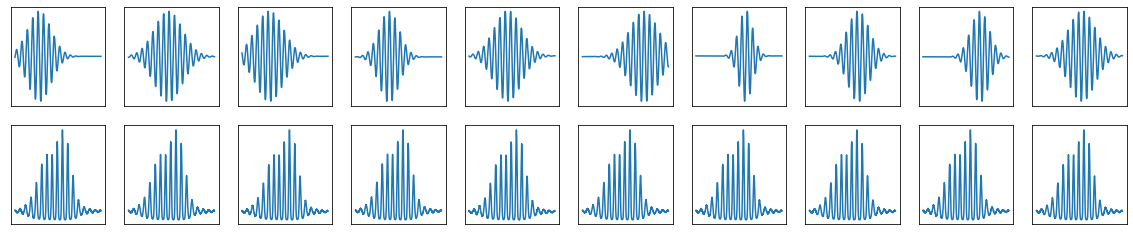

In [24]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.plot(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.plot(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()